# 03 Clustering RPE
This Jupyter notebook (05.03) details the clustering steps using optimized neighbor and PCs.

**This notebook also outputs a CSV file of the obs dataframe which contains sample-leiden cluster assignments.**

## Initialize Environment
First import all the necessary packages here:

In [1]:
# Import necessary packages
import os
import scanpy as sc
import numpy as np
import pandas as pd
import anndata as ad
import seaborn as sns
import scanpy.external as sce
import matplotlib.pyplot as pl
import anndata2ri
import logging

from matplotlib import colors
from datetime import datetime as dt
from scipy.stats import median_abs_deviation

pl.rcParams['pdf.fonttype'] = 'truetype'
sc.set_figure_params(vector_friendly=False, dpi_save=300, transparent=True)
pl.rcParams['lines.linewidth'] = 0.1
sc.set_figure_params(color_map='viridis')
colorsComb = np.vstack([pl.cm.Reds(np.linspace(0, 1, 10)), pl.cm.Greys_r(np.linspace(0.7, 0.8, 0))])
mymap = colors.LinearSegmentedColormap.from_list('my_colormap', colorsComb)

sc.settings.verbosity = 3 # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.set_figure_params(dpi=120, color_map='viridis')  # low dpi (dots per inch) yields small inline figures

Identify the starting directory. Get a timestamp for the run. From the timestamp, derive the resulting output h5ad filename.

In [2]:
# Name Variables and Settings
prefix = "03_"                                           # Filename prefix        
suffix = "_clustering_RPE"                               # Filename suffix   
savedata = True                                          # Save data at the end

# Set working directory
os.chdir("/home/dalbao/2023-012-Runx3mutD8scRNA/AlbaoRunx3Manuscript/single_cell/03_clustering")

# Determine work location
print("The work location for this notebook is: " + os.getcwd() + "\n")

# Get a timestamp for the start of the run
timestamp = dt.now()
print("This notebook was last run on " + timestamp.strftime("%y-%m-%d %H:%M") + " UTC\n")

# Determine the filename for the expected output h5ad
fn = prefix + timestamp.strftime("%y-%m-%d-%H-%M")
print("The filename for the AnnData output of this notebook will be:")
print(fn + suffix + ".h5ad")
print("which will be saved in the WORKDIR/h5ad/ folder.\n")

The work location for this notebook is: /home/dalbao/2023-012-Runx3mutD8scRNA/AlbaoRunx3Manuscript/single_cell/03_clustering

This notebook was last run on 25-12-06 01:06 UTC

The filename for the AnnData output of this notebook will be:
03_25-12-06-01-06_clustering_RPE.h5ad
which will be saved in the WORKDIR/h5ad/ folder.



The work directory is structured to contain a folder named "h5ad" which itself contains output from previous analysis steps. Import data from the latest analysis:

In [3]:
# Determine input file
input = "01_25-12-05-17-25_preprocessing_RPE.h5ad"
print("The input h5ad file is: h5ad/" + input)

# List items in outs folder
adata = ad.read_h5ad("../../h5ad/" + input)

# Inspect AnnData
print(adata)

The input h5ad file is: h5ad/01_25-12-05-17-25_preprocessing_RPE.h5ad
AnnData object with n_obs × n_vars = 16314 × 18505
    obs: 'experiment', 'group', 'timepoint', 'infection', 'cell_id', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'doublet_score', 'predicted_doublet', 'scDblFinder_score', 'scDblFinder_class', 'gem', 'QC', 'n_genes', 'S_score', 'G2M_score', 'phase'
    var: 'mt', 'ribo', 'n_cells_by_counts-gem1', 'mean_counts-gem1', 'log1p_mean_counts-gem1', 'pct_dropout_by_counts-gem1', 'total_counts-gem1', 'log1p_total_counts-gem1', 'n_cells_by_counts-gem2', 'mean_counts-gem2', 'log1p_mean_counts-gem2', 'pct_dropout_by_counts-gem2', 'total_counts-gem2', 'log1p_total_counts-gem2', 'n_cells', 'n_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'group_colors', 'hvg', 'log1

## Nearest Neighbor Analyses and UMAP

Visual optimization suggests using 40 PCs with a 15 nearest neighbors. This is based on visual inspection of notebook 05.02v00.

computing neighbors
    using 'X_pca' with n_pcs = 40


2025-12-06 01:06:56.637507: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:15)
running Leiden clustering
    finished: found 16 clusters and added
    'leiden_r1.5', the cluster labels (adata.obs, categorical) (0:00:02)
running Leiden clustering
    finished: found 14 clusters and added
    'leiden_r1', the cluster labels (adata.obs, categorical) (0:00:01)
running Leiden clustering
    finished: found 14 clusters and added
    'leiden_r0.9', the cluster labels (adata.obs, categorical) (0:00:01)
running Leiden clustering
    finished: found 12 clusters and added
    'leiden_r0.8', the cluster labels (adata.obs, categorical) (0:00:01)
running Leiden clustering
    finished: found 12 clusters and added
    'leiden_r0.7', the cluster labels (adata.obs, categorical) (0:00:01)
running Leiden clustering
    finished: found 12 clusters and added
    'leiden_r0.6', the cluster labels (adata.obs, catego

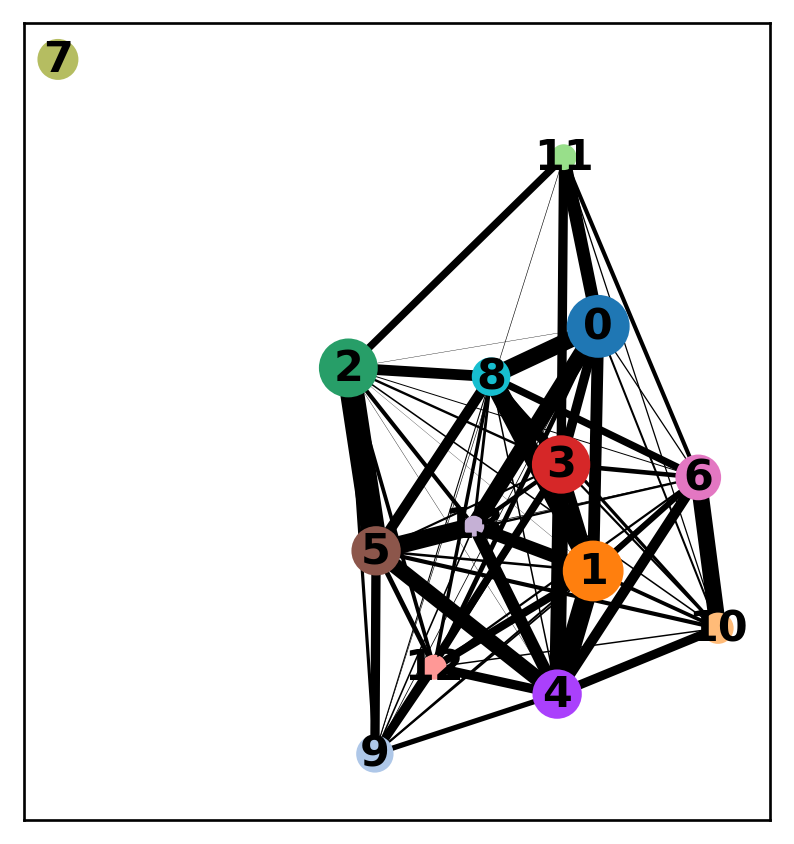

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:06)


/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1207: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):
/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1216: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1207: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future ve

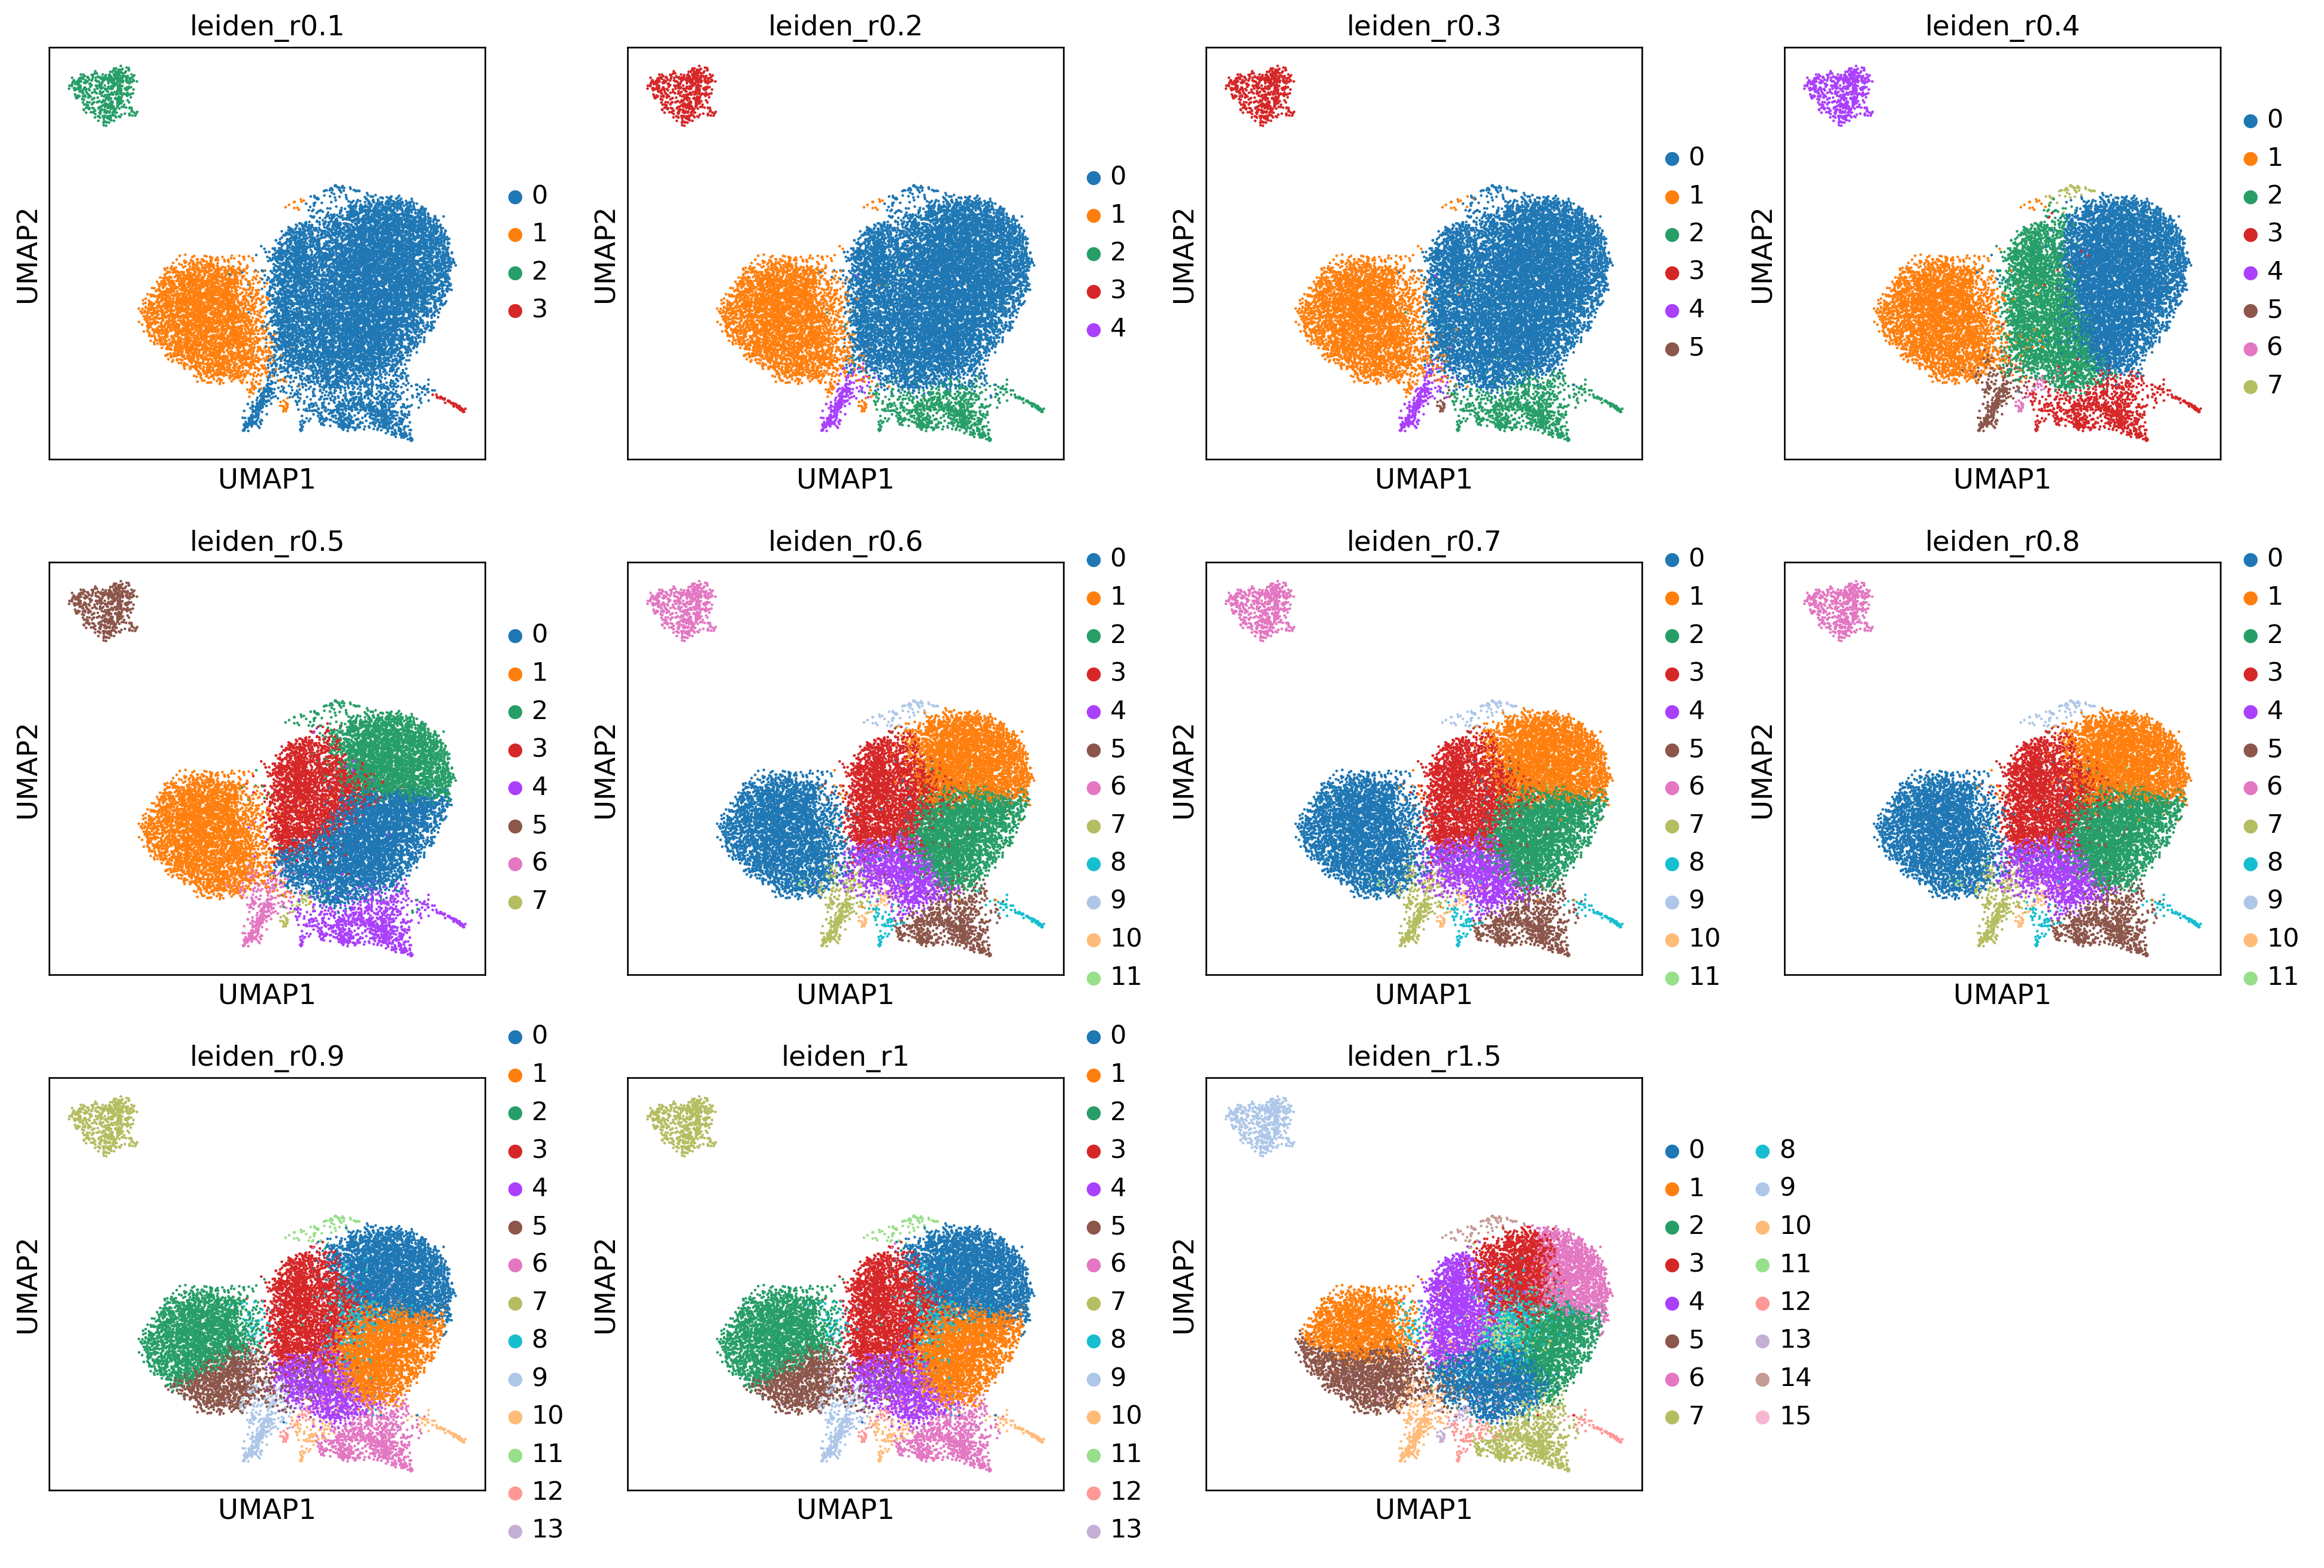

/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1207: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):
/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1216: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


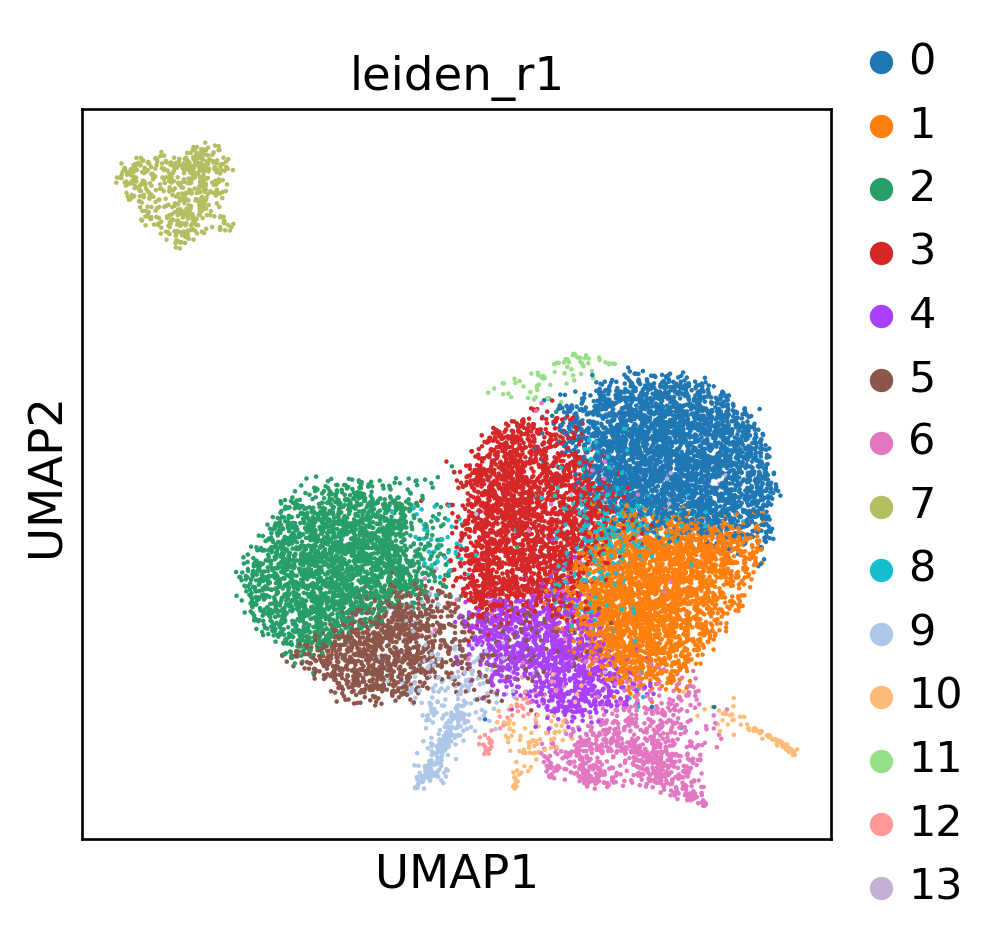

/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1207: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):
/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1216: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


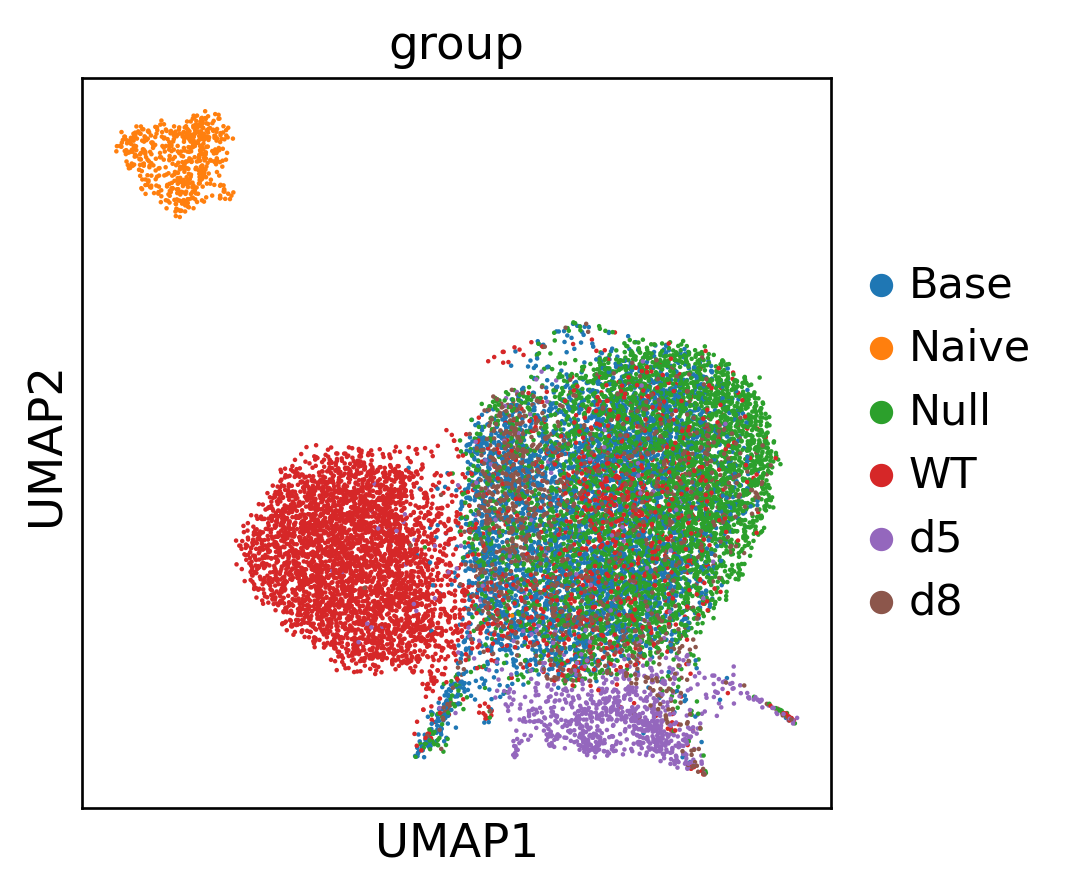

/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1207: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):
/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1216: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


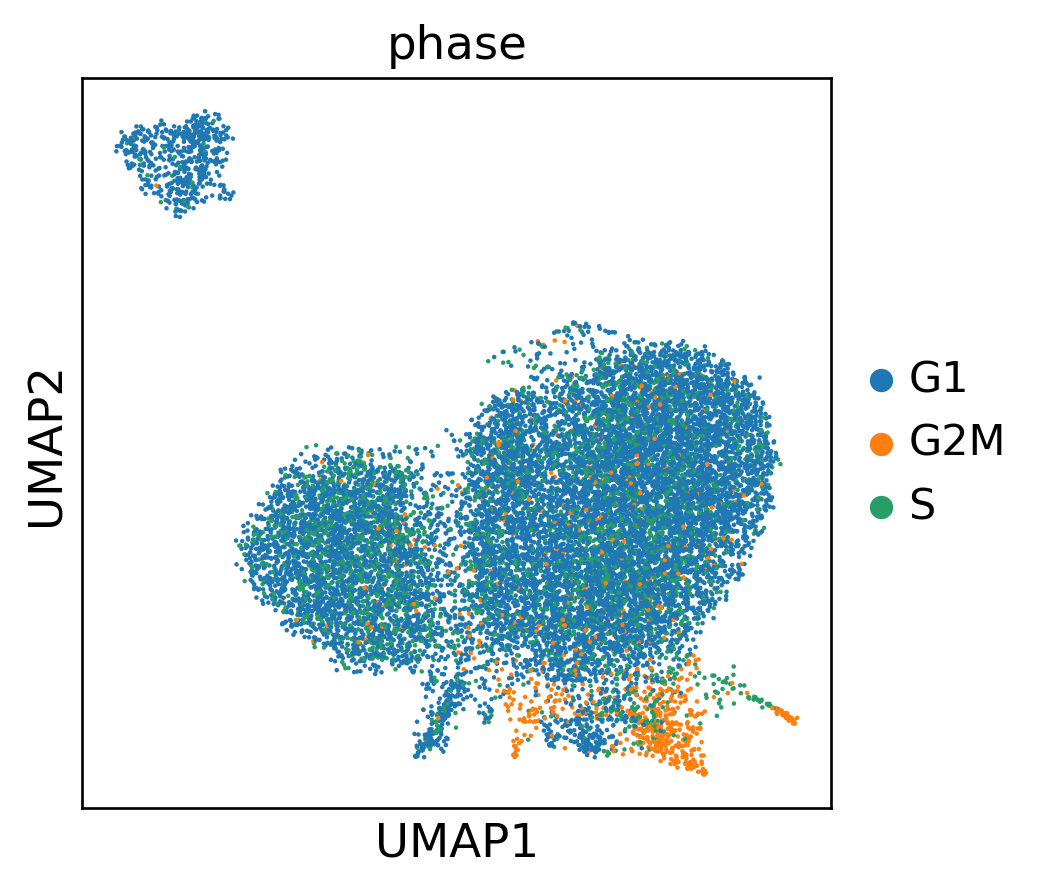

Number of unique clusters in leiden_r0.1: 4
Number of unique clusters in leiden_r0.2: 5
Number of unique clusters in leiden_r0.3: 6
Number of unique clusters in leiden_r0.4: 8
Number of unique clusters in leiden_r0.5: 8
Number of unique clusters in leiden_r0.6: 12
Number of unique clusters in leiden_r0.7: 12
Number of unique clusters in leiden_r0.8: 12
Number of unique clusters in leiden_r0.9: 14
Number of unique clusters in leiden_r1: 14
Number of unique clusters in leiden_r1.5: 16


In [4]:
# Calculate nearest neighbors with n_neighbors 15 and 40 pcs
sc.pp.neighbors(adata, n_neighbors = 15, n_pcs = 40)

# Perform leiden clustering
sc.tl.leiden(adata,random_state=1,resolution=1.5, key_added='leiden_r1.5')
sc.tl.leiden(adata,random_state=1,resolution=1, key_added='leiden_r1')
sc.tl.leiden(adata,random_state=1,resolution=1, key_added='leiden_r0.9')
sc.tl.leiden(adata,random_state=1, resolution=0.8, key_added='leiden_r0.8')
sc.tl.leiden(adata,random_state=1, resolution=0.8, key_added='leiden_r0.7')
sc.tl.leiden(adata,random_state=1, resolution=0.8, key_added='leiden_r0.6')
sc.tl.leiden(adata,random_state=1, resolution=0.5, key_added='leiden_r0.5')
sc.tl.leiden(adata,random_state=1, resolution=0.4, key_added='leiden_r0.4')
sc.tl.leiden(adata,random_state=1, resolution=0.3, key_added='leiden_r0.3')
sc.tl.leiden(adata,random_state=1, resolution=0.2, key_added='leiden_r0.2')
sc.tl.leiden(adata,random_state=1, resolution=0.1, key_added='leiden_r0.1')

# Initialize PAGA
sc.tl.paga(adata, groups = 'leiden_r1')

# Plot PAGA
sc.pl.paga(adata)

# Calculate UMAP using intialized PAGA
sc.tl.umap(adata, init_pos='paga')

# Plot UMAP with annotation by leiden clusters and original identity
sc.pl.umap(adata, color =  ['leiden_r0.1',  'leiden_r0.2', 'leiden_r0.3',
                            'leiden_r0.4', 'leiden_r0.5',  'leiden_r0.6',
                            'leiden_r0.7', 'leiden_r0.8',  'leiden_r0.9',
                            'leiden_r1', 'leiden_r1.5'])


# Plot remapped UMAP
sc.pl.umap(adata, color = "leiden_r1")
sc.pl.umap(adata, color = "group")
sc.pl.umap(adata, color = "phase")

# Print number of unique clusters per resolution
for res in ['leiden_r0.1',  'leiden_r0.2', 'leiden_r0.3', 'leiden_r0.4', 'leiden_r0.5',  'leiden_r0.6', 'leiden_r0.7', 'leiden_r0.8',
            'leiden_r0.9', 'leiden_r1', 'leiden_r1.5']:
    n_clusters = adata.obs[res].nunique()
    print(f"Number of unique clusters in {res}: {n_clusters}")

## Remap Leiden Clusters

Remap to previous old RPE clusters, see attached notebook showing concordance.

In [5]:
# Load mapping CSV
mapping_df = pd.read_csv("../../source_data/newRPEassignments.csv")
mapping_df.head()

newRPE  oldRPE
0       0       2
1       1       4
2       2       3
3       3       1
4       4       0

In [6]:
import pandas as pd

# ------------------------------------------------------------
# 1. Rename current leiden_r1 → leiden_r1_as_resolved
# ------------------------------------------------------------
adata.obs["leiden_r1_as_resolved"] = adata.obs["leiden_r1"].astype(str)

# ------------------------------------------------------------
# 2. Build a mapping dictionary from mapping_df
# mapping_df must have columns: newRPE, oldRPE
# ------------------------------------------------------------
# Ensure both columns are strings for safe mapping
mapping_df["newRPE"] = mapping_df["newRPE"].astype(str)
mapping_df["oldRPE"] = mapping_df["oldRPE"].astype(str)

# Create dictionary: {newRPE_value → oldRPE_value}
mapping_dict = dict(zip(mapping_df["newRPE"], mapping_df["oldRPE"]))

# ------------------------------------------------------------
# 3. Create new leiden_r1 column using the mapping
# ------------------------------------------------------------
adata.obs["leiden_r1"] = (
    adata.obs["leiden_r1_as_resolved"]
    .map(mapping_dict)          # map newRPE → oldRPE
)

# Optional: check for unmapped values
unmapped = adata.obs["leiden_r1"].isna().sum()
if unmapped > 0:
    print(f"Warning: {unmapped} cells did not map to an oldRPE value.")

# ------------------------------------------------------------
# 4. Convert to categorical 0–13
# ------------------------------------------------------------

# Convert to integer if possible
adata.obs["leiden_r1"] = adata.obs["leiden_r1"].astype(int)

# Define ordered categories 0–13
categories = [str(i) for i in range(14)]  # "0" through "13"

adata.obs["leiden_r1"] = (
    adata.obs["leiden_r1"]
    .astype(str)
    .astype(pd.CategoricalDtype(categories=categories, ordered=True))
)


/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1207: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):
/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1216: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


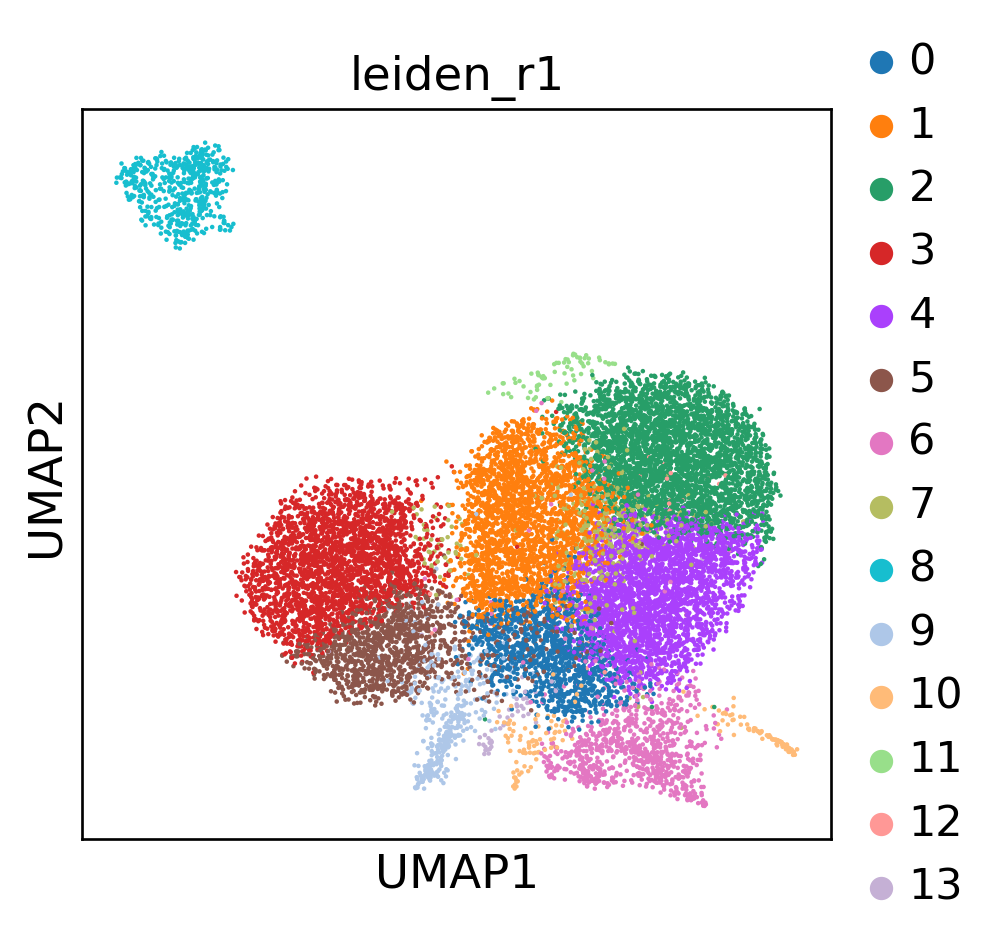

In [7]:
# Plot remapped UMAP
sc.pl.umap(adata, color = "leiden_r1")

Visualize expression levels throughout the UMAP of key genes:

/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1207: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):


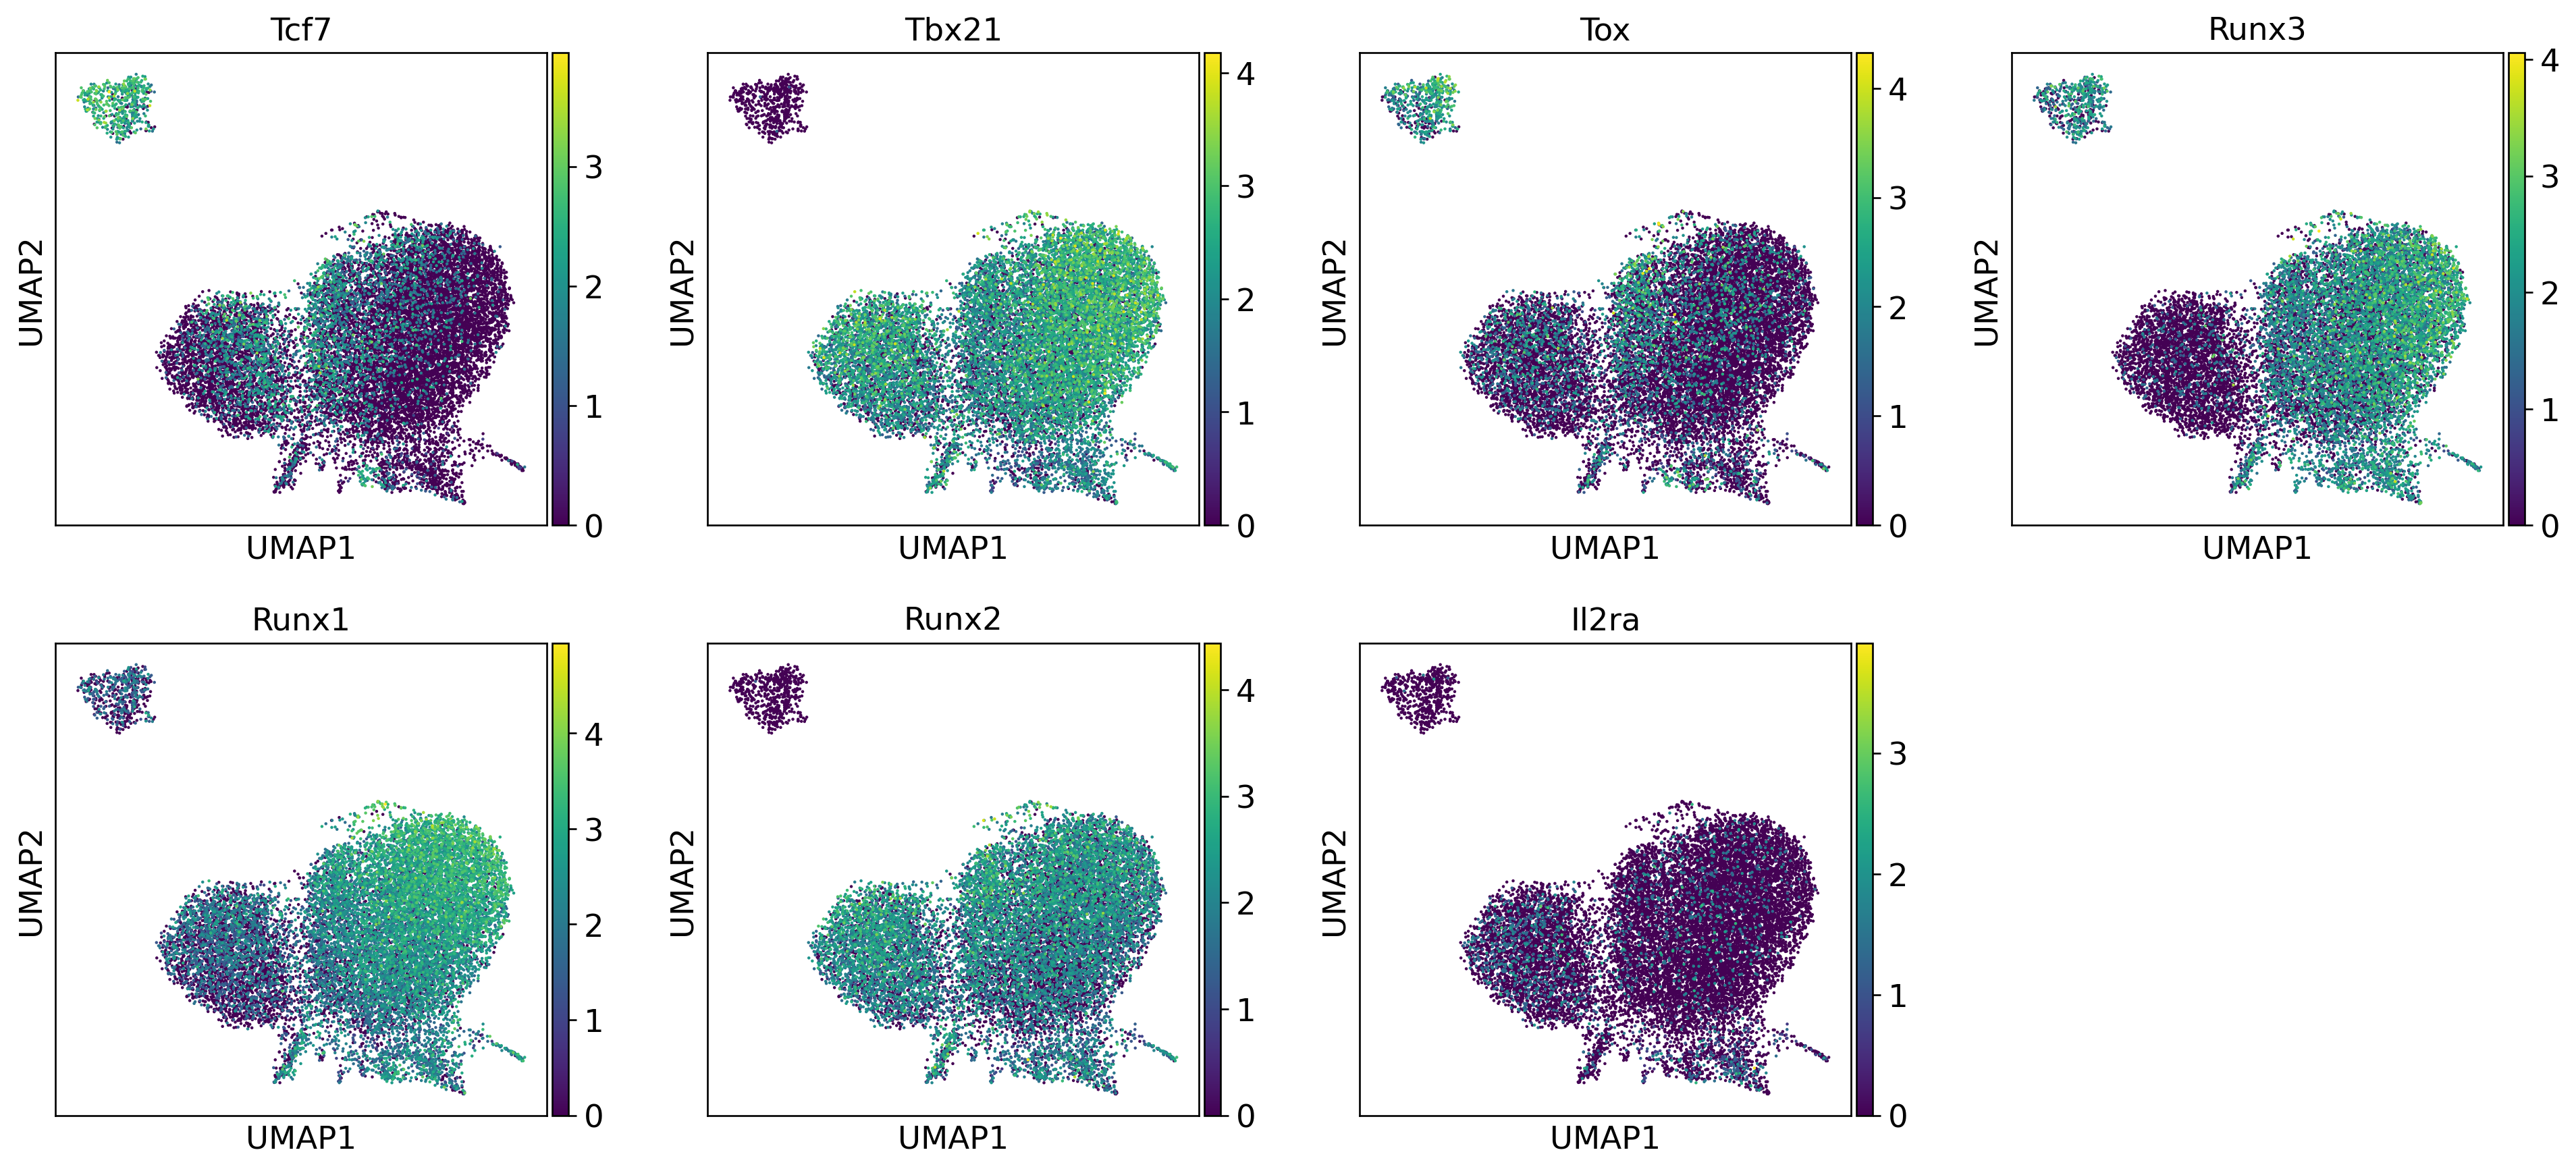

In [8]:
sc.pl.umap(adata, color = ["Tcf7", "Tbx21", "Tox", "Runx3", "Runx1", "Runx2", "Il2ra"])

/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:168: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:178: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dot_color_df = self.obs_tidy.groupby(level=0).mean()
/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:748: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


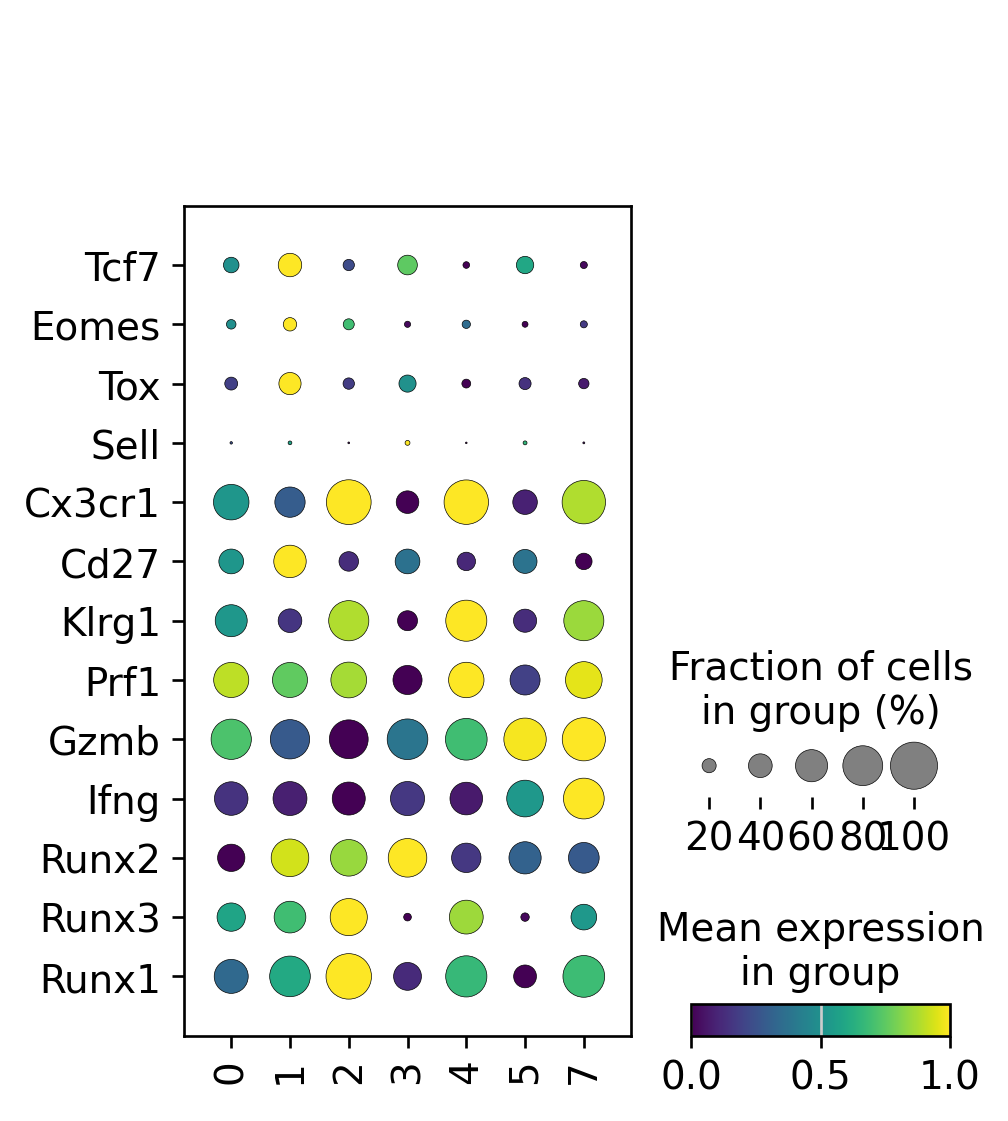

In [9]:
# Define leiden groups to keep
keep = ["0","1","2","3","4","5","7"]

# Subset adata based on leiden_r1
adata_sub = adata[adata.obs["leiden_r1"].isin(keep)].copy()

sc.pl.dotplot(
    adata_sub,
    var_names=["Tcf7", "Eomes", "Tox", "Sell", "Cx3cr1", "Cd27", "Klrg1" ,"Prf1", "Gzmb", "Ifng", "Runx2", "Runx3", "Runx1"],
    groupby="leiden_r1",
    standard_scale="var",
    swap_axes=True,
    cmap = "viridis"
)

## Cluster-Group Distributions
Analyze the distribution of each sample into different leiden clusters.

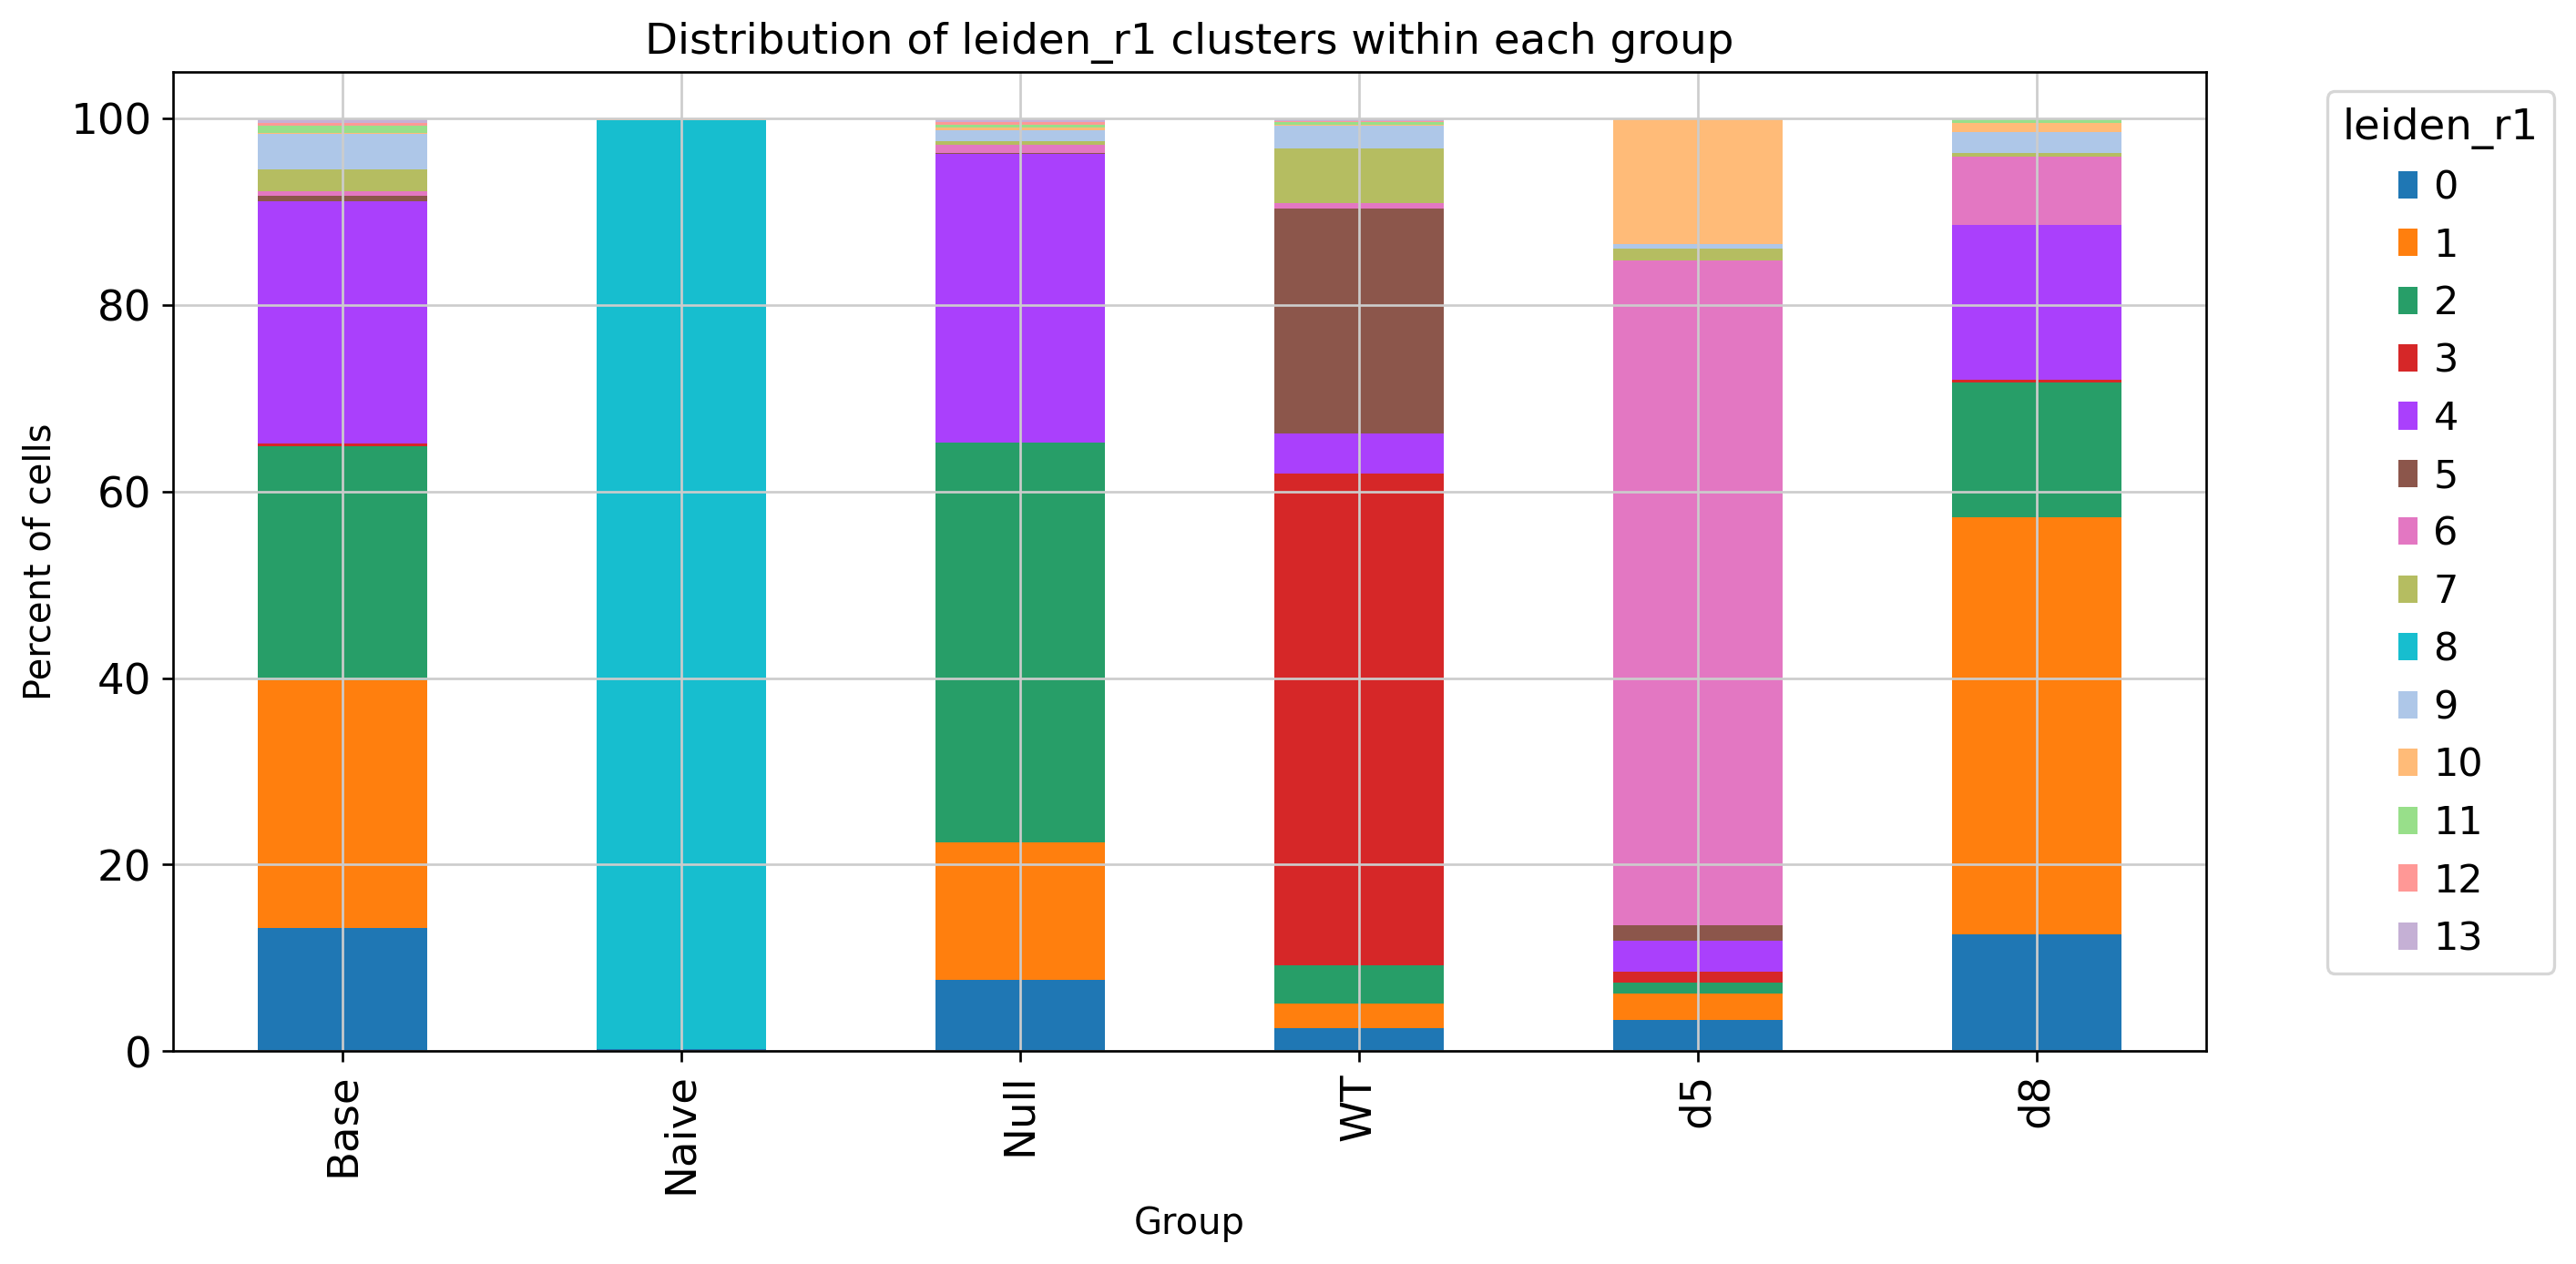

leiden_r1          0          1          2          3          4          5  \
group                                                                         
Base       13.199905  26.518942  25.160829   0.238265  25.970932   0.619490   
Naive       0.183824   0.000000   0.000000   0.000000   0.000000   0.000000   
Null        7.645126  14.742607  42.803943   0.000000  30.952903   0.087623   
WT          2.505176   2.650104   4.057971  52.691511   4.306418  24.057971   
d5          3.302374   2.889577   1.135191   1.238390   3.302374   1.651187   
d8         12.572374  44.665012  14.474773   0.248139  16.625310   0.000000   

leiden_r1          6         7          8         9         10        11  \
group                                                                      
Base        0.500357  2.311175   0.000000  3.812247   0.047653  0.810102   
Naive       0.000000  0.000000  99.632353  0.000000   0.183824  0.000000   
Null        0.898138  0.372399   0.000000  1.204819   0.262870  0.372399   
WT          0.662526  5.838509   0.000000  2.401656   0.165631  0.289855   
d5         71.207430  1.341589   0.000000  0.412797  13.415893  0.000000   
d8          7.278743  0.413565   0.000000  2.233251   0.992556  0.330852   

leiden_r1        12        13  
group                          
Base       0.262092  0.548010  
Naive      0.000000  0.000000  
Null       0.219058  0.438116  
WT         0.082816  0.289855  
d5         0.000000  0.103199  
d8         0.000000  0.165426

In [10]:
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt

# Extract metadata
obs_df = sc.get.obs_df(adata, ["group", "leiden_r1"])

# Build contingency table (rows = group, columns = clusters)
ct = pd.crosstab(obs_df["group"], obs_df["leiden_r1"])

# Normalize to percent within each group
pct = ct.div(ct.sum(axis=1), axis=0) * 100

# ---------------------------------------------------------
# Get leiden_r1 colors from adata (Scanpy stores them here)
# ---------------------------------------------------------
cluster_colors = adata.uns["leiden_r1_colors"]

# Ensure columns in pct are sorted numerically if needed
pct = pct.reindex(sorted(pct.columns, key=lambda x: int(x)), axis=1)

# Match colors to cluster order
color_map = [cluster_colors[int(cl)] for cl in pct.columns]

# ---------------------------------------------------------
# Plot stacked bar chart with the Scanpy cluster colors
# ---------------------------------------------------------
fig, ax = plt.subplots(figsize=(12, 6))

pct.plot(
    kind="bar",
    stacked=True,
    color=color_map,
    ax=ax
)

ax.set_ylabel("Percent of cells", fontsize=12)
ax.set_xlabel("Group", fontsize=12)
ax.set_title("Distribution of leiden_r1 clusters within each group", fontsize=14)
ax.legend(
    title="leiden_r1",
    bbox_to_anchor=(1.05, 1),
    loc="upper left"
)

plt.tight_layout()
plt.show()

pct

## Save Data
Procedures for saving data are outlined below:

In [11]:
# Reminder for the saved data
if savedata:
    print("The filename for the AnnData output of this notebook will be: ")
    print(fn + suffix + ".h5ad")
    print("which will be saved in the h5ad/ folder.")
    
    # Save data to an AnnData file
    adata.write_h5ad(filename = "../../h5ad/" + fn  + suffix + ".h5ad", compression = "gzip", compression_opts = 9)
    print(adata)
    
    # Get all observations into obs_df
    obs_df = adata.obs
    
    # Determine the filename for the expected output csv
    print("\nThe filename for the CSV output of this notebook will be:")
    print(fn + "_obsDf" + suffix + ".csv")
    print("which will be saved in the WORKDIR/csv/ folder.\n")
    
    # Export CSV
    obs_df.to_csv("../../csv/" + fn + "_obsDf" + suffix + ".csv", index = False)
else:

    print("Not saving the AnnData file!")
    
# End of Notebook
print("\nNotebook Ends")

The filename for the AnnData output of this notebook will be: 
03_25-12-06-01-06_clustering_RPE.h5ad
which will be saved in the h5ad/ folder.
AnnData object with n_obs × n_vars = 16314 × 18505
    obs: 'experiment', 'group', 'timepoint', 'infection', 'cell_id', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'doublet_score', 'predicted_doublet', 'scDblFinder_score', 'scDblFinder_class', 'gem', 'QC', 'n_genes', 'S_score', 'G2M_score', 'phase', 'leiden_r1.5', 'leiden_r1', 'leiden_r0.9', 'leiden_r0.8', 'leiden_r0.7', 'leiden_r0.6', 'leiden_r0.5', 'leiden_r0.4', 'leiden_r0.3', 'leiden_r0.2', 'leiden_r0.1', 'leiden_r1_as_resolved'
    var: 'mt', 'ribo', 'n_cells_by_counts-gem1', 'mean_counts-gem1', 'log1p_mean_counts-gem1', 'pct_dropout_by_counts-gem1', 'total_counts-gem1', 'log1p_total_counts-gem1', 'n_cells_by_counts-gem2', '